<a href="https://colab.research.google.com/github/gapv09/Trabajos-Aplicativos/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea N° 2 del Curso de Desarrollo Económico**

Esta tarea forma parte del análisis macroeconómico de series temporales trimestrales, aplicado al caso del PIB per cápita del Perú entre 1979 y 2024. El objetivo principal es estudiar el comportamiento del producto a lo largo del tiempo mediante técnicas estadísticas que permiten separar sus componentes clave:

*   Desestacionalización: para eliminar las fluctuaciones estacionales y observar
*   el comportamiento estructural del PIB.
*   Filtro de Hodrick-Prescott: para estimar la tendencia de largo plazo y analizar las desviaciones cíclicas.
*   Ciclo de crecimiento: para medir cuánto se desvía el PIB respecto a su tendencia, interpretando estos movimientos como fases de expansión o contracción económica.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving desarrollo.xlsx to desarrollo.xlsx


# **Pregunta N° 1**



In [9]:
import pandas as pd

# Cargar el archivo
df = pd.read_excel('desarrollo.xlsx')

# Mostrar las primeras filas para verificar
df.head()

,AÑO,PIB,CRECI,PIBPC,CRECI1
0,1950,40920,0.000000,5361.312080,0.000000
1,1951,44711,9.264418,5712.944443,6.558700
2,1952,47347,5.895641,5899.407667,3.263873
3,1953,50085,5.782837,6084.052857,3.129894
4,1954,52762,5.344914,6246.243487,2.665832


In [11]:
import numpy as np

# Crear una nueva columna con el logaritmo natural del PIB per cápita
df['log_PIB_per_capita'] = np.log(df['PIBPC'])

# Mostrar el resultado
df.head()

,AÑO,PIB,CRECI,PIBPC,CRECI1,log_PIB_per_capita
0,1950,40920,0.000000,5361.312080,0.000000,8.586964
1,1951,44711,9.264418,5712.944443,6.558700,8.650490
2,1952,47347,5.895641,5899.407667,3.263873,8.682607
3,1953,50085,5.782837,6084.052857,3.129894,8.713426
4,1954,52762,5.344914,6246.243487,2.665832,8.739736


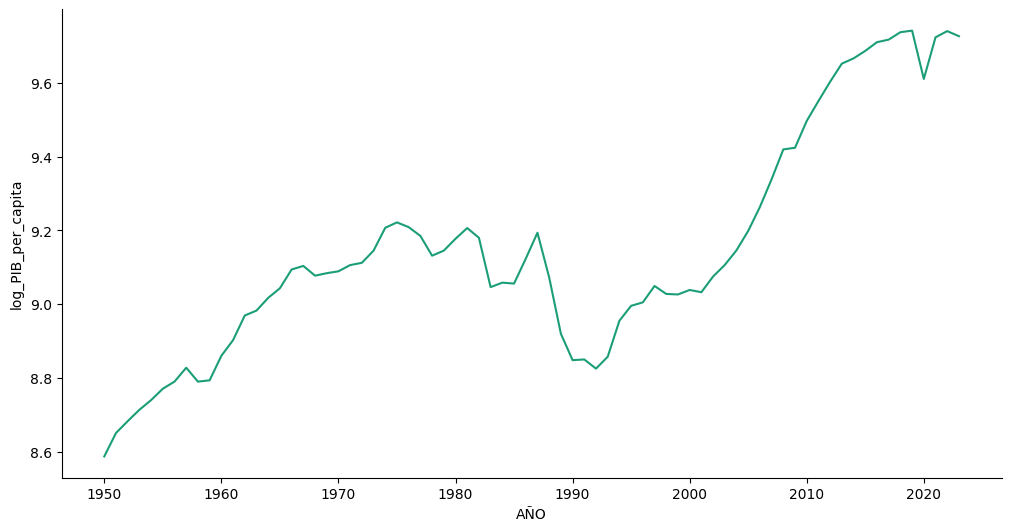

In [8]:
# @title AÑO vs log_PIBPC

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['AÑO']
  ys = series['log_PIB_per_capita']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('AÑO', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('AÑO')
_ = plt.ylabel('log_PIB_per_capita')

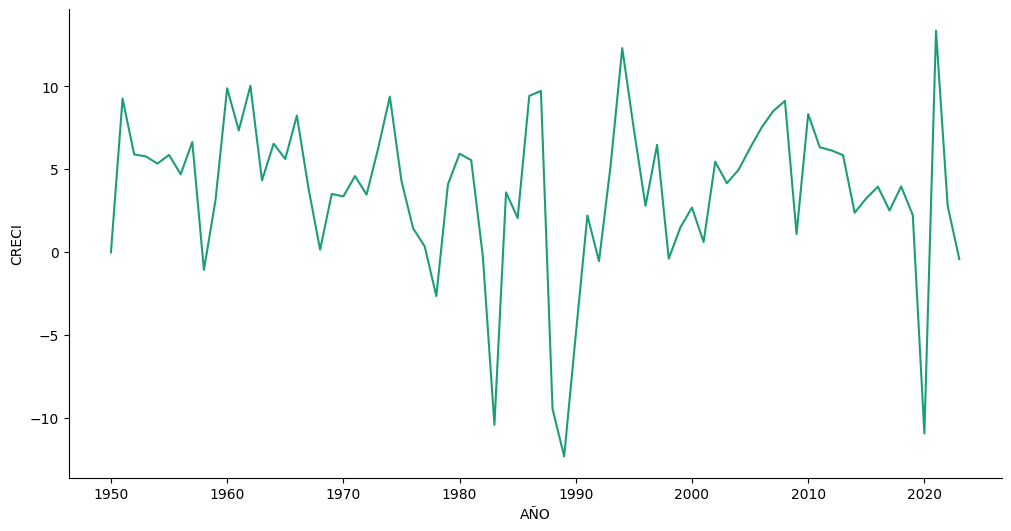

In [7]:
# @title AÑO vs CRECI

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['AÑO']
  ys = series['CRECI']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('AÑO', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('AÑO')
_ = plt.ylabel('CRECI')

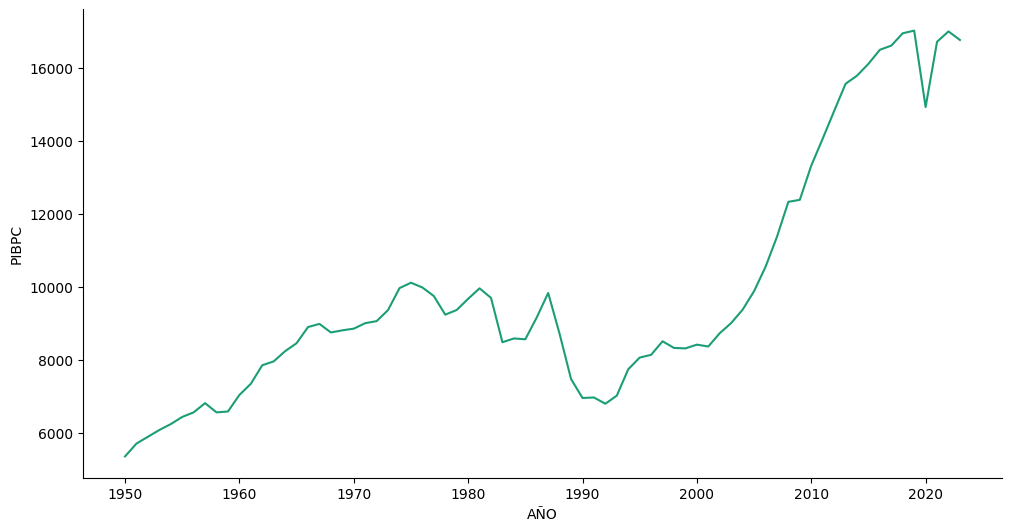

In [6]:
# @title AÑO vs PIBPC

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['AÑO']
  ys = series['PIBPC']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('AÑO', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('AÑO')
_ = plt.ylabel('PIBPC')

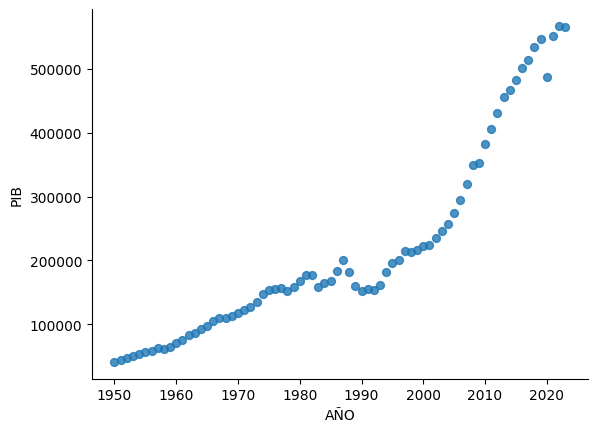

In [5]:
# @title AÑO vs PIB

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='AÑO', y='PIB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

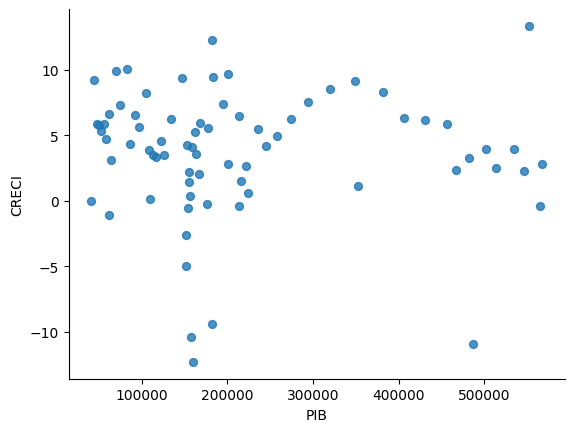

In [4]:
# @title PIB vs CRECI

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='PIB', y='CRECI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Pregunta N°2**

In [3]:
import pandas as pd

# Lee la hoja 'Hoja2'
df = pd.read_excel('desarrollo.xlsx', sheet_name='Hoja2')

# Muestra las primeras filas
df.head()

,AÑO,PIB
0,1979Q1,34514
1,1979Q2,40882
2,1979Q3,40671
3,1979Q4,42183
4,1980Q1,36357


In [10]:
!pip install statsmodels openpyxl

In [19]:
# Asegúrate de que se usan correctamente los nombres de columnas
df['fecha'] = pd.PeriodIndex(df['AÑO'], freq='Q').to_timestamp()

# Establecer la fecha como índice
df.set_index('fecha', inplace=True)

# Asegúrate que la columna PIB es numérica
df['PIB'] = pd.to_numeric(df['PIB'], errors='coerce')

# Mostrar las primeras filas
df.head()

,AÑO,PIB,CRECI,PIBPC,CRECI1,log_PIB_per_capita,PIB_desestacionalizado,log_PIB,log_PIB_tendencia,log_PIB_ciclo,ciclo_crecimiento
fecha,,,,,,,,,,,
1950-01-01,1950,40920,0.000000,5361.312080,0.000000,8.586964,NaN,NaN,NaN,NaN,NaN
1951-01-01,1951,44711,9.264418,5712.944443,6.558700,8.650490,NaN,NaN,NaN,NaN,NaN
1952-01-01,1952,47347,5.895641,5899.407667,3.263873,8.682607,49637.242341,10.812497,10.789466,0.023030,0.023030
1953-01-01,1953,50085,5.782837,6084.052857,3.129894,8.713426,50480.874285,10.829350,10.841713,-0.012364,-0.012364
1954-01-01,1954,52762,5.344914,6246.243487,2.665832,8.739736,51967.129187,10.858367,10.893975,-0.035608,-0.035608


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Eliminar valores nulos
serie = df['PIB'].dropna()

# Descomposición aditiva (usa 'multiplicative' si ves variaciones crecientes)
descomposicion = seasonal_decompose(serie, model='additive', period=4)

# Crear la columna desestacionalizada
df['PIB_desestacionalizado'] = descomposicion.trend + descomposicion.resid

# Verifica los resultados
df[['PIB', 'PIB_desestacionalizado']].dropna().head()

,PIB,PIB_desestacionalizado
2,47347,49637.242341
3,50085,50480.874285
4,52762,51967.129187
5,55858,53966.754187
6,58484,60774.242341


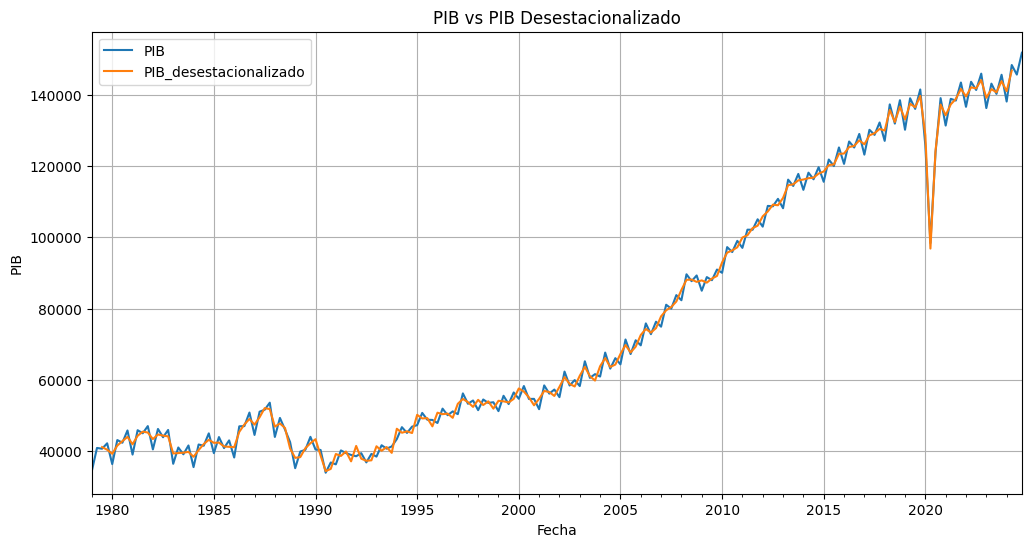

In [6]:
import matplotlib.pyplot as plt

df[['PIB', 'PIB_desestacionalizado']].plot(figsize=(12,6), title='PIB vs PIB Desestacionalizado')
plt.ylabel('PIB')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

In [7]:
import statsmodels.api as sm

# Usaremos el PIB desestacionalizado
# Asegúrate de eliminar valores nulos
pib_serie = df['PIB_desestacionalizado'].dropna()

# Aplicamos el filtro HP - lambda = 1600 para datos trimestrales
ciclo, tendencia = sm.tsa.filters.hpfilter(pib_serie, lamb=1600)

# Agregamos al DataFrame
df.loc[pib_serie.index, 'Tendencia_HP'] = tendencia
df.loc[pib_serie.index, 'Ciclo_HP'] = ciclo

# Ver los primeros resultados
df[['PIB_desestacionalizado', 'Tendencia_HP', 'Ciclo_HP']].dropna().head()

,PIB_desestacionalizado,Tendencia_HP,Ciclo_HP
fecha,,,
1979-07-01,41125.590278,41663.601131,-538.010853
1979-10-01,40386.340278,41766.597076,-1380.256798
1980-01-01,39252.301389,41869.256765,-2616.955376
1980-04-01,41548.768056,41970.381280,-421.613224
1980-07-01,42798.590278,42067.136106,731.454172


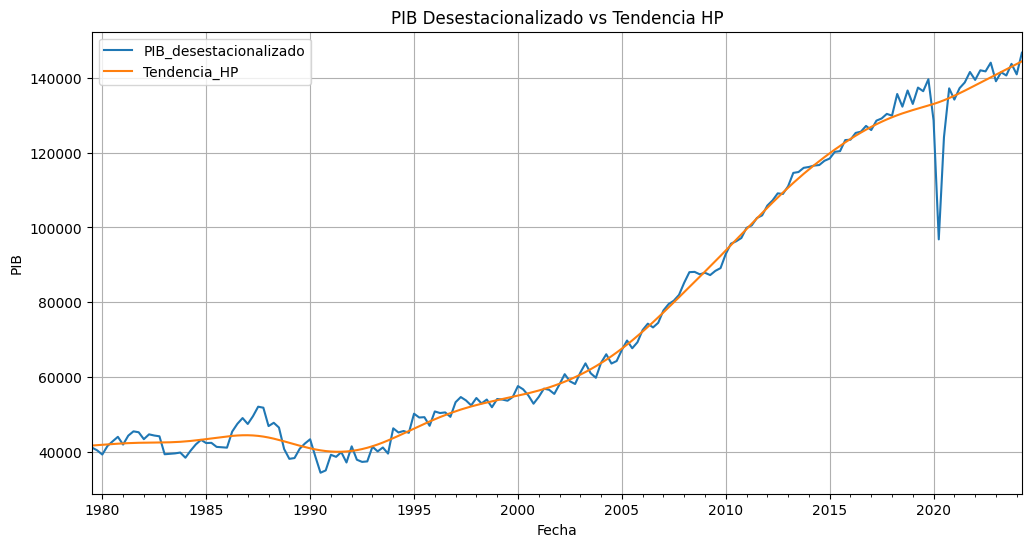

In [8]:
import matplotlib.pyplot as plt

df[['PIB_desestacionalizado', 'Tendencia_HP']].dropna().plot(figsize=(12,6), title='PIB Desestacionalizado vs Tendencia HP')
plt.ylabel('PIB')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

In [14]:
import numpy as np

df['log_PIB'] = np.log(df['PIB_desestacionalizado'])

In [15]:
import statsmodels.api as sm

# Aplicar filtro HP al logaritmo del PIB
ciclo, tendencia = sm.tsa.filters.hpfilter(df['log_PIB'].dropna(), lamb=1600)

# Guardar en el DataFrame
df.loc[ciclo.index, 'log_PIB_tendencia'] = tendencia
df.loc[ciclo.index, 'log_PIB_ciclo'] = ciclo

In [16]:
# Ciclo de crecimiento: log_PIB - log_PIB_tendencia
df['ciclo_crecimiento'] = df['log_PIB'] - df['log_PIB_tendencia']

Recreated 'fecha' column using 'AÑO' column.


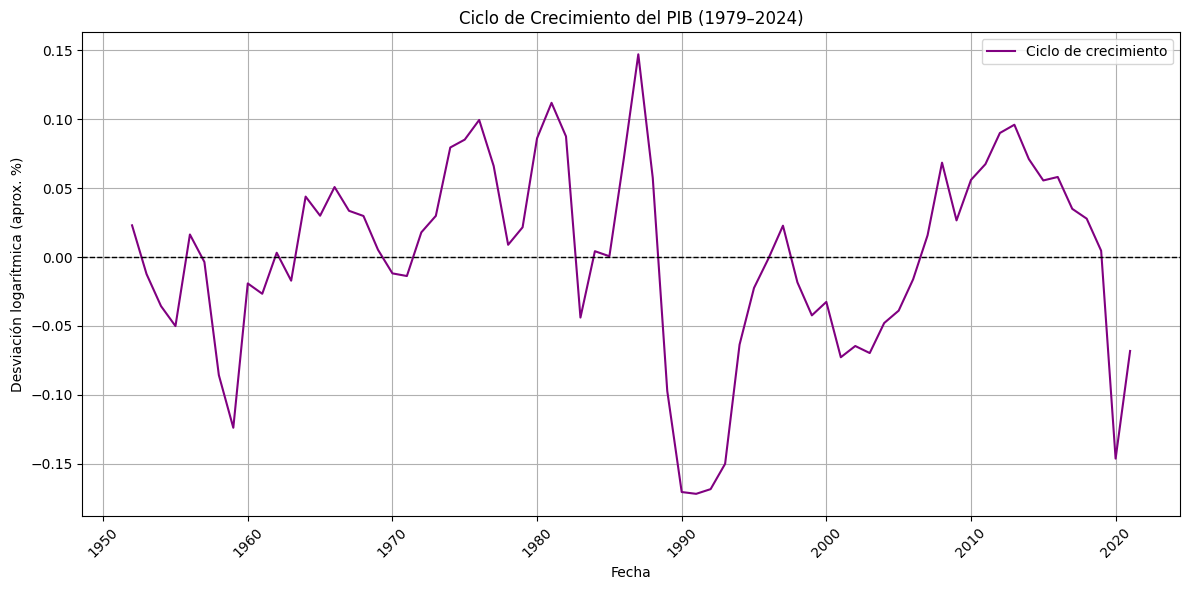

In [23]:
import matplotlib.pyplot as plt

# Check if 'fecha' column exists in the DataFrame
if 'fecha' not in df.columns:
    # If not, try recreating it using the 'AÑO' column if available
    if 'AÑO' in df.columns:
        df['fecha'] = pd.PeriodIndex(df['AÑO'], freq='Q').to_timestamp()
        print("Recreated 'fecha' column using 'AÑO' column.")
    else:
        raise KeyError("Neither 'fecha' nor 'AÑO' column found in DataFrame. Cannot plot.")

plt.figure(figsize=(12,6))
plt.plot(df['fecha'], df['ciclo_crecimiento'], color='purple', label='Ciclo de crecimiento')
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Títulos y etiquetas
plt.title('Ciclo de Crecimiento del PIB (1979–2024)')
plt.xlabel('Fecha')
plt.ylabel('Desviación logarítmica (aprox. %)')
plt.grid(True)
plt.legend()

# Rotar fechas para mejor visibilidad
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Pregunta N°3**

In [24]:
import pandas as pd

# Lee la hoja 'Hoja2'
df = pd.read_excel('desarrollo.xlsx', sheet_name='Hoja3')

# Muestra las primeras filas
df.head()

,AÑO,PIB1,PIB_CEP,PIB_CEP.1,PIB_BP,PIB_POT
0,1950,40920,42922,-4.892473,1.757087,-3.291789
1,1951,44711,46688,-4.421731,7.671490,1.006464
2,1952,47347,49376,-4.285382,6.131328,1.402412
3,1953,50085,51433,-2.691425,5.820106,1.405610
4,1954,52762,53265,-0.953338,5.820477,0.993139


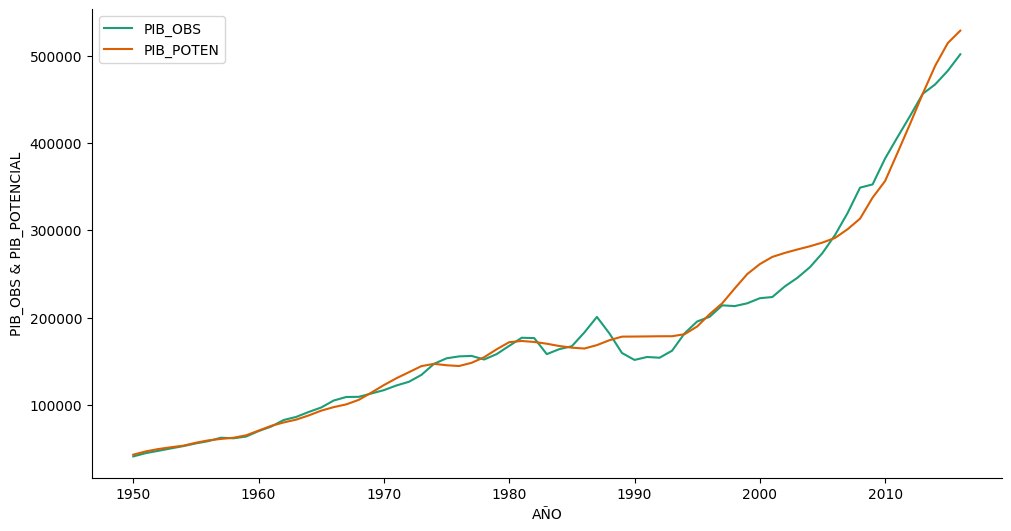

In [29]:
# @title AÑO vs PIB1/PIB_CEP

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['AÑO']
  ys = series['PIB1']
  ys1 = series['PIB_CEP']

  # Plot both series with labels for the legend
  plt.plot(xs, ys, label='PIB_OBS', color=palette[series_index % len(palette)])
  plt.plot(xs, ys1, label='PIB_POTEN', color=palette[(series_index + 1) % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('AÑO', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('AÑO')
plt.ylabel('PIB_OBS & PIB_POTENCIAL')
plt.legend()
plt.show()

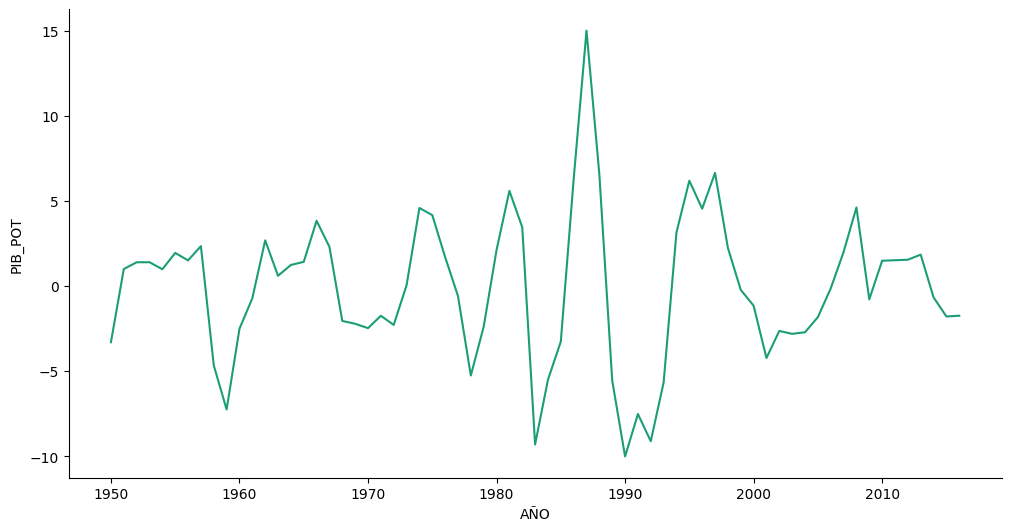

In [32]:
# @title AÑO vs PIB_POT

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['AÑO']
  ys = series['PIB_POT']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('AÑO', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('AÑO')
_ = plt.ylabel('PIB_POT')